# Hybrid Deep Learning Model

# Part 1 - SOM

# Install MiniSom Package

In [55]:
!pip install MiniSom

## Importing the libraries


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [57]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [58]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

# Training the SOM


In [59]:
from minisom import MiniSom
#total 15 features , 10*10 som grid
#radius of Influence , sigma 1.0
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)

som.random_weights_init(X)
#Initializes the SOM's weight matrix randomly using the input data X. 
#The weight matrix will be used during the training process to represent the learned patterns.
som.train_random(data = X, num_iteration = 100)

# Visualizing the results


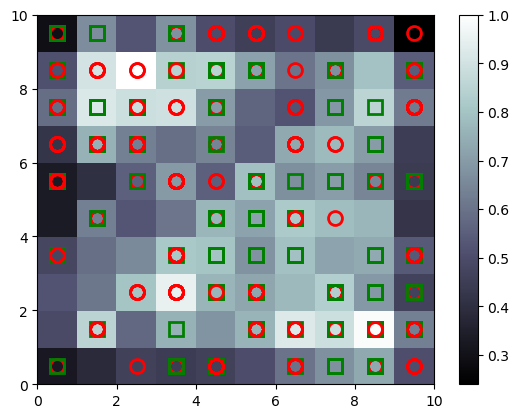

In [60]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [61]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)


# Printing the Fraunch Clients

In [62]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15738487
15773421
15781875
15636521
15761554
15815095
15720725
15694677
15598614
15698522
15643056
15632503
15673747
15569917


# Part 2 - Going from Unsupervised to Supervised Deep Learning

# Create Matrix of Features

In [63]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [64]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

# Part 3 - ANN

### Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

customers dataset has been transformed such that each feature now has a mean of 0 and a standard deviation of 1, as it helps in handling features with different scales and ensures that no single feature dominates the learning process due to its larger magnitude.

## Building the ANN

# Import Tensorflow

In [66]:
import tensorflow as tf
tf.__version__

'2.10.0'

## Initializing the ANN

In [67]:
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer

In [68]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [69]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [70]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [71]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 784us/step - loss: 0.4425 - accuracy: 0.8971
Epoch 2/10
690/690 [==============================] - 1s 836us/step - loss: 0.2649 - accuracy: 0.9797
Epoch 3/10
690/690 [==============================] - 0s 713us/step - loss: 0.1911 - accuracy: 0.9797
Epoch 4/10
690/690 [==============================] - 0s 709us/step - loss: 0.1513 - accuracy: 0.9797
Epoch 5/10
690/690 [==============================] - 0s 710us/step - loss: 0.1225 - accuracy: 0.9797
Epoch 6/10
690/690 [==============================] - 0s 710us/step - loss: 0.1018 - accuracy: 0.9797
Epoch 7/10
690/690 [==============================] - 0s 712us/step - loss: 0.0877 - accuracy: 0.9797
Epoch 8/10
690/690 [==============================] - 0s 707us/step - loss: 0.0800 - accuracy: 0.9797
Epoch 9/10
690/690 [==============================] - 0s 712us/step - loss: 0.0759 - accuracy: 0.9797
Epoch 10/10
690/690 [==============================] - 0s 707us/step - loss: 0.073

## Predicting test set results

In [72]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 675us/step


In [73]:
print(y_pred)

[[1.56058720e+07 5.53568907e-06]
 [1.57238270e+07 4.32921152e-05]
 [1.56366260e+07 7.04905542e-05]
 ...
 [1.57818750e+07 1.61263615e-01]
 [1.57938250e+07 1.61263615e-01]
 [1.57384870e+07 1.61263615e-01]]
